## 初期設定

In [0]:
!pip install face_recognition

In [0]:
from google.colab import files

In [0]:
files.upload()

In [0]:
ls

face020.png  face306.png  face316.png  face325.png      face_jp_004.png
face041.png  face308.png  face317.png  face326.png      face_jp_005.png
face102.png  face309.png  face318.png  face327.png      face_jp_006.png
face103.png  face310.png  face319.png  face328.png      face_jp_007.png
face302.png  face311.png  face320.png  face330.png      face_jp_008.png
face303.png  face312.png  face322.png  face_jp_001.png  face_jp_009.png
face304.png  face314.png  face323.png  face_jp_002.png  face_jp_010.png
face305.png  face315.png  face324.png  face_jp_003.png  sample_data/


## 顔認識

In [0]:
import face_recognition
from PIL import Image, ImageDraw

In [0]:
image = face_recognition.load_image_file("face302.png")
face_locations = face_recognition.face_locations(image)
face_locations # 右上(y1, x1), 左下(y2, x2)

[(171, 379, 439, 111)]

In [0]:
# 顔の領域に枠をつける
def face_detection(image, face_locations):
    im = Image.fromarray(image)
    draw = ImageDraw.Draw(im)
    for face_location in face_locations:
        location = (face_location[1], face_location[0], face_location[3], face_location[2])
        draw.rectangle(location, fill=None, outline=(255, 0, 0), width=5)
    return im

In [0]:
face_detection(image, face_locations)

## 類似度検証

In [0]:
image1 = face_recognition.load_image_file("face_jp_005.png")
image2 = face_recognition.load_image_file("face_jp_004.png")

In [0]:
encoding1 = face_recognition.face_encodings(image1)[0]
encoding2 = face_recognition.face_encodings(image2)[0]

In [0]:
Image.fromarray(image1)

In [0]:
Image.fromarray(image2)

In [0]:
face_recognition.compare_faces([encoding1], encoding2, tolerance=0.5) # distance between face to face

[False]

## ランドマーク

In [0]:
def landmark_point(xy1, size=5):
    xy2 = xy1[0]+size, xy1[1]+size
    return [(xy1), (xy2)]

In [0]:
image = face_recognition.load_image_file("face302.png")
face_landmark_list = face_recognition.face_landmarks(image)

In [0]:
im = Image.fromarray(image)
draw = ImageDraw.Draw(im)

for face_landmark in face_landmark_list[0]:
    for xy in face_landmark_list[0][face_landmark]:
        draw.ellipse(landmark_point(xy, size=10), outline=(255,0,0), fill=(255,0,0))

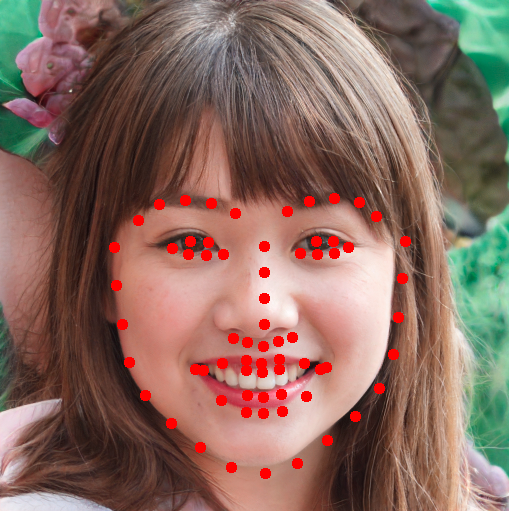

In [0]:
im